In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
titanic.shape


(891, 15)

In [8]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


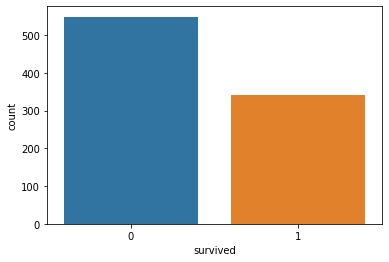

In [9]:
sns.countplot(titanic['survived'])

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

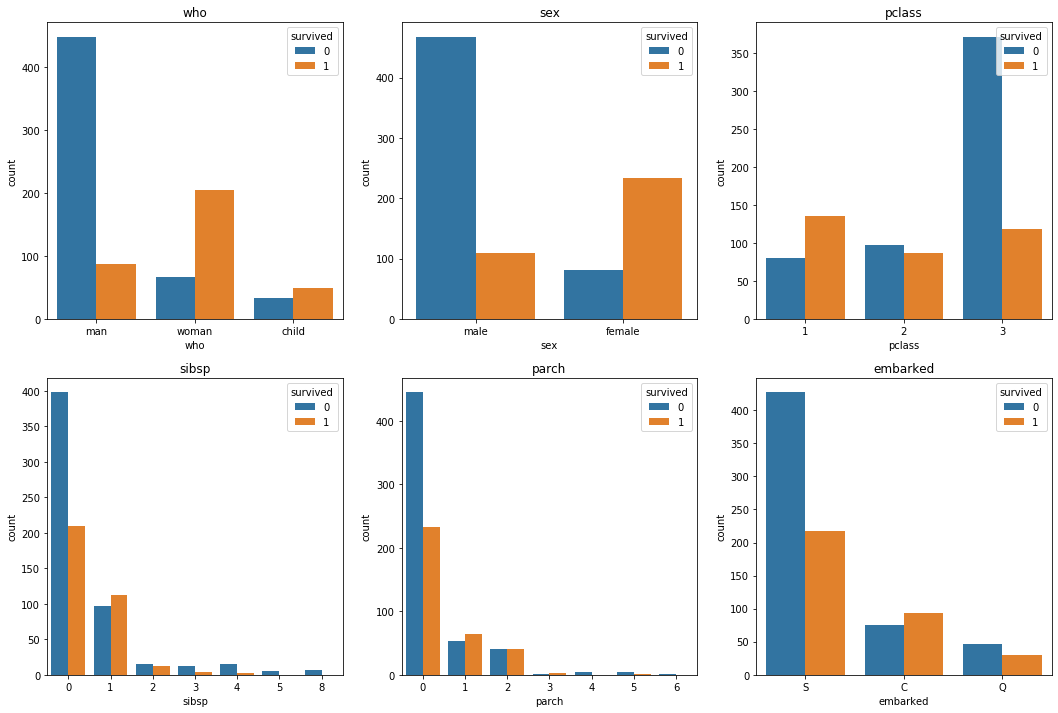

In [15]:
#visualising the count of survivors for columns who, sex, pclass, sibsp, parch, embarked
cols=['who','sex','pclass','sibsp','parch','embarked']

n_rows=2
n_cols=3

fig, axs=plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*6))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i=r*n_cols + c       #index to go through num of cols
        ax=axs[r][c]         #pos of plot
        sns.countplot(titanic[cols[i]], hue=titanic['survived'],ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='survived', loc='upper right')
        
        
plt.tight_layout

In [16]:
titanic.groupby('sex')[['survived']].mean()   #survival rate by sex

,survived
sex,
female,0.742038
male,0.188908


In [19]:
titanic.pivot_table('survived', index='sex', columns='class')   #survival rate by sex and passenger class


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


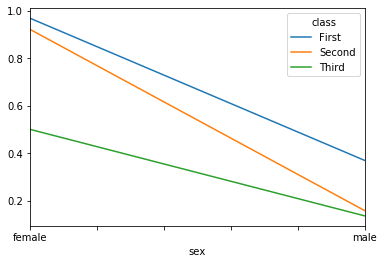

In [20]:
titanic.pivot_table('survived', index='sex', columns='class').plot()

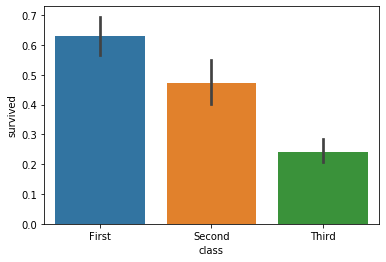

In [21]:
sns.barplot(x='class', y='survived', data=titanic)

In [22]:
#count the empty vals in each col
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [23]:
for val in titanic:
    print(titanic[val].value_counts())
    print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [10]:
titanic=titanic.drop(['embark_town','alive','who','class','adult_male','deck','alone'], axis=1)

In [11]:
titanic=titanic.dropna(subset=['embarked','age'])

In [12]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [13]:
print(titanic['embarked'].unique())
print(titanic['sex'].unique())

['S' 'C' 'Q']
['male' 'female']


In [14]:
from sklearn.preprocessing import LabelEncoder
labenc=LabelEncoder()

#Encoding the embarked and sex columns(inorder to make all values as int or float)
titanic.iloc[:,7]=labenc.fit_transform(titanic.iloc[:,7].values)
titanic.iloc[:,2]=labenc.fit_transform(titanic.iloc[:,2].values)

In [15]:
print(titanic['embarked'].unique())
print(titanic['sex'].unique())

[2 0 1]
[1 0]


In [16]:
#split the data into independent X and independent Y var
X=titanic.iloc[:,1:8].values
Y=titanic.iloc[:,0].values

In [17]:
#split the data into 75% training and 25% testing 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [18]:
#scale the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [19]:
#creating a fn with many ml models
def models(X_train,Y_train):
    #using logistic regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)
    
    #using KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
    knn.fit(X_train, Y_train)
    
    #using SVC(linear kernrel)
    from sklearn.svm import SVC
    svc_lin=SVC(kernel='linear',random_state=0)
    svc_lin.fit(X_train, Y_train)
    
    #using SVC(RBF kernel)
    from sklearn.svm import SVC
    svc_rbf=SVC(kernel='rbf',random_state=0)
    svc_rbf.fit(X_train, Y_train)
    
    #using Gaussian
    from sklearn.naive_bayes import GaussianNB
    gauss=GaussianNB()
    gauss.fit(X_train, Y_train)
    
    #using decision tree
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion='entropy', random_state=0)
    tree.fit(X_train, Y_train)
    
    #using RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    forest.fit(X_train, Y_train)
    
    #printing the training accuracy for each of the models
    print('[0]Logistic Regression training accuracy : ', log.score(X_train, Y_train))
    print('[1]Kneighbors training accuracy : ', knn.score(X_train, Y_train))
    print('[2]SVC Linear Kernel Regression training accuracy : ', svc_lin.score(X_train, Y_train))
    print('[3]SVC RBF Kernel training accuracy : ', svc_rbf.score(X_train, Y_train))
    print('[4]Gaussian training accuracy : ', gauss.score(X_train, Y_train))
    print('[5]Decision Tree training accuracy : ', tree.score(X_train, Y_train))
    print('[6]RandomForestClassifier training accuracy : ', forest.score(X_train, Y_train))
    
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest 

In [20]:
#get and train all models
model=models(X_train, Y_train)

/home/anibs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0]Logistic Regression training accuracy :  0.8108614232209738
[1]Kneighbors training accuracy :  0.8689138576779026
[2]SVC Linear Kernel Regression training accuracy :  0.7865168539325843
[3]SVC RBF Kernel training accuracy :  0.850187265917603
[4]Gaussian training accuracy :  0.799625468164794
[5]Decision Tree training accuracy :  0.9925093632958801
[6]RandomForestClassifier training accuracy :  0.9794007490636704


In [43]:
#confusion matrix and accuracy for all of the models
from sklearn.metrics import confusion_matrix

for i in range( len(model) ):
    cm=confusion_matrix(Y_test, model[i].predict(X_test))
    
    #extract truenegative, falsepositive, falsenegative, truepositive
    TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
    
    test_score=(TP+TN)/(TP+TN+FP+FN)
    
    print(cm)
    print('Model[{}] Testing Accuracy="{}"'.format(i, test_score))
    print()

[[90 14]
 [24 50]]
Model[0] Testing Accuracy="0.7865168539325843"

[[81 23]
 [22 52]]
Model[1] Testing Accuracy="0.7471910112359551"

[[86 18]
 [23 51]]
Model[2] Testing Accuracy="0.7696629213483146"

[[91 13]
 [23 51]]
Model[3] Testing Accuracy="0.797752808988764"

[[88 16]
 [30 44]]
Model[4] Testing Accuracy="0.7415730337078652"

[[72 32]
 [20 54]]
Model[5] Testing Accuracy="0.7078651685393258"

[[88 16]
 [23 51]]
Model[6] Testing Accuracy="0.7808988764044944"



In [22]:
#get feature importance
forest=model[6]
importances=pd.DataFrame({'feature':titanic.iloc[:, 1:8].columns, 'importance':np.round(forest.feature_importances_, 3)})
importances=importances.sort_values('importance', ascending=False).set_index('feature')
importances

,importance
feature,
age,0.315
fare,0.286
sex,0.180
pclass,0.088
sibsp,0.051
parch,0.043
embarked,0.036


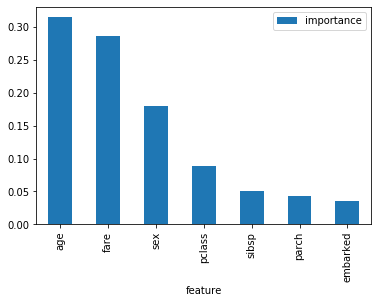

In [23]:
#visualising the importance
importances.plot.bar()

In [24]:
#print the prediction of Random Forest Classifier
pred=model[6].predict(X_test)
print(pred)

print()

#printing the actual values for comparing
print(Y_test)

[0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0]


In [25]:
titanic.dtypes

survived      int64
pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
dtype: object

In [49]:
#entering values for the above fields
mysurvival=[[1,0,40,1,4,720,2]]

#scaling mysurvival
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
mysurvival_scaled=sc.fit_transform(mysurvival)

pred=model[6].predict(mysurvival_scaled)
print(pred)

if(pred==0):
    print(":(")
else:
    print(":)")
    

[-1]
:(
